# Bank Customer Churn 

## Get  Data 

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_folder = Path("/Users/weiyiwang/code/TheWangAndOnly/BankCustomerChurn/Data")

file_to_open = data_folder / "ChurnModeling.csv"

f = open(file_to_open)

df = pd.read_csv(f)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#corr = df.corr()
#corr

In [5]:
#sns.histplot(df['Exited'])

## Preprocessing Data

### Encoding Objects (Geography & Gender)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
scaler = RobustScaler()
log_reg = LogisticRegression(max_iter = 1000)
label = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [7]:
ohe.fit(df[['Gender']])
gender_encoded = ohe.transform(df[['Gender']])
df['Female'], df['Male'] = gender_encoded.T

In [8]:
ohe.fit(df[['Geography']])
geography_encoded = ohe.transform(df[['Geography']])
df["France"],df["Germany"],df['Spain'] = geography_encoded.T

In [9]:
df = df.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname', 'Gender'], axis = 1)

In [10]:
df.corr()['Exited'].drop('Exited')

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Female             0.106512
Male              -0.106512
France            -0.104955
Germany            0.173488
Spain             -0.052667
Name: Exited, dtype: float64

In [11]:
y = df['Exited']
X = df.drop('Exited', axis = 1)

<AxesSubplot:>

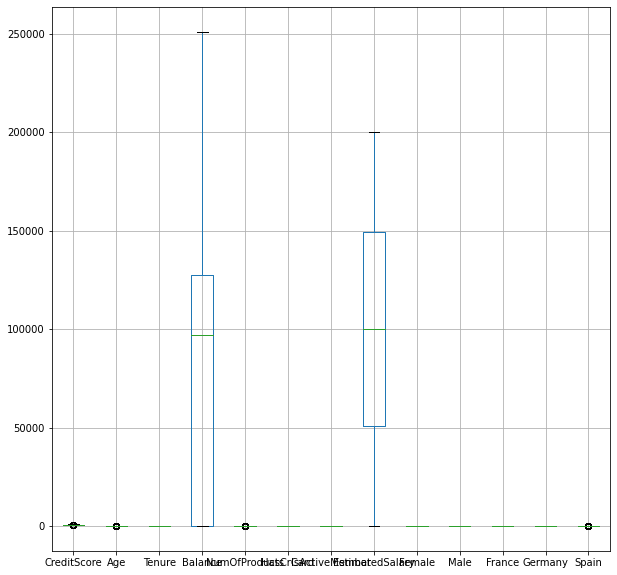

In [12]:
plt.figure(figsize=(10,10))
X.boxplot()

### Split data in train and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
model = log_reg.fit(X_train_scaled,y_train)

In [43]:
1 - df['Exited'].sum()/len(df['Exited'])

0.7963

In [25]:
scores = cross_val_score(log_reg, X_train_scaled, y_train, cv =10)
scores.mean()

0.8088749999999999

In [36]:
log_reg.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])